<a href="https://colab.research.google.com/github/sKazmierczyk/Projekt1/blob/main/results_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_predict

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('drive/MyDrive/Data_ML.csv')

In [ ]:
data.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [5]:
new_data = data.copy()
new_data = new_data.drop('Unnamed: 0', axis=1)
new_data =new_data.drop('HaveWorkedWith', axis=1) # droping unnessesery datas

# Transformation of 'age'(1-age>35, 0-age<=35)
new_data['Age'] = (data['Age'] == '>35')

# Transformation of 'Accessibility' (1-Yes, 0-No)
new_data['Accessibility'] = (data['Accessibility'] == 'Yes')

# Transformation of 'EdLevel'
ed_level_mapping = {'Master': 1, 'Undergraduate': 2, 'PhD': 3, 'Other': 4, 'NoHigherEd': 0}
new_data['EdLevel'] = data['EdLevel'].map(ed_level_mapping)

# Transformation of 'Employment' (1-employed, 0-not employed)
new_data['Employment'] = (data['Employment'] == 1)

# Transformation of 'Gender'
gender_mapping = {'Man': 1, 'Woman': 2, 'NonBinary': 0}
new_data['Gender'] = data['Gender'].map(gender_mapping)

# Transformation of'MentalHealth' (1-Yes, 0-No)
new_data['MentalHealth'] = (data['MentalHealth'] == 'Yes')

# Transformation of 'MainBranch'(1-Dev, 0-NotDev)
new_data['MainBranch'] = (data['MainBranch'] == 'Dev')




# Transformation of 'Employed'(1-Employed, 0-Not Employed)
new_data['Employed'] = data['Employed']

print(new_data)

         Age  Accessibility  EdLevel  Employment  Gender  MentalHealth  \
0      False          False        1        True       1         False   
1      False          False        2        True       1         False   
2      False          False        1        True       1         False   
3      False          False        2        True       1         False   
4       True          False        3       False       1         False   
...      ...            ...      ...         ...     ...           ...   
73457  False          False        2        True       1         False   
73458   True          False        2        True       1         False   
73459  False          False        2        True       1         False   
73460  False           True        2        True       1          True   
73461  False          False        1        True       0         False   

       MainBranch  YearsCode  YearsCodePro  \
0            True          7             4   
1            True  

In [ ]:
new_data = new_data[new_data['Gender'] != 0]

filtred_data = new_data.drop(['Accessibility', 'Employment', 'MentalHealth', 'Employed'], axis=1)


countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France',
    'Germany', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Japan', 'Liechtenstein',
    'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Singapore',
    'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
    'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Italy', 'Czech Republic', 'Slovakia',
    'Greece', 'Taiwan', 'Hong Kong', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Estonia']


filtred_data['developed'] = filtred_data['Country'].isin(countries)
filtred_data = filtred_data.drop('Country', axis=1)

data_man = filtred_data[filtred_data['Gender'] == 1]
data_dev_man = data_man[data_man['developed'] == True]
data_ndev_man = data_man[data_man['developed'] == False]
#data_dev_man = data_dev_man.drop(['MainBranch', 'Gender', 'YearsCode', 'ComputerSkills', 'EdLevel'] , axis =  1)
#data_ndev_man = data_ndev_man.drop(['MainBranch', 'Gender', 'YearsCode', 'ComputerSkills', 'EdLevel'] , axis =  1)
dev_man_salary = data_dev_man['PreviousSalary']
ndev_man_salary = data_ndev_man['PreviousSalary']
data_dev_man = data_dev_man.drop('PreviousSalary', axis = 1)
data_ndev_man = data_ndev_man.drop('PreviousSalary', axis = 1)

data_woman = filtred_data[filtred_data['Gender'] == 2]
data_dev_woman = data_woman[data_woman['developed'] == True]
data_ndev_woman = data_woman[data_woman['developed'] == False]
#data_dev_man = data_dev_man.drop(['MainBranch', 'Gender', 'YearsCode', 'ComputerSkills', 'EdLevel'] , axis =  1)
#data_ndev_man = data_ndev_man.drop(['MainBranch', 'Gender', 'YearsCode', 'ComputerSkills', 'EdLevel'] , axis =  1)
dev_woman_salary = data_dev_woman['PreviousSalary']
ndev_woman_salary = data_ndev_woman['PreviousSalary']
data_dev_woman = data_dev_woman.drop('PreviousSalary', axis = 1)
data_ndev_woman = data_ndev_woman.drop('PreviousSalary', axis = 1)



In [ ]:
print('dms: ',dev_man_salary.median(), 'dws: ',dev_woman_salary.median(), 'ndms: ', ndev_man_salary.median(), 'ndws: ',ndev_woman_salary.median())

dms:  77000.0 dws:  70771.0 ndms:  23892.0 ndws:  17148.0


In [6]:
new_data = new_data[new_data['Gender'] != 0]

filtred_data = new_data.drop(['Accessibility', 'Employment', 'MentalHealth', 'Employed'], axis=1)


countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France',
    'Germany', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Japan', 'Liechtenstein',
    'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Singapore',
    'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
    'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Italy', 'Czech Republic', 'Slovakia',
    'Greece', 'Taiwan', 'Hong Kong', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Estonia']


filtred_data['developed'] = filtred_data['Country'].isin(countries)
filtred_data = filtred_data.drop('Country', axis=1)
filtred_data_salary = filtred_data['PreviousSalary']
filtred_data = filtred_data.drop('PreviousSalary', axis = 1)

In [ ]:
filtred_data.head()

,Age,EdLevel,Gender,MainBranch,YearsCode,YearsCodePro,ComputerSkills,developed
0,False,1,1,True,7,4,4,True
1,False,2,1,True,12,5,12,True
2,False,1,1,True,15,6,7,True
3,False,2,1,True,9,6,13,True
4,True,3,1,False,40,30,2,True


In [ ]:
x_train, x_val, x_test = np.split(data_dev_man.sample(frac=1, random_state = 20), [int(.6*len(data_dev_man)), int(.8*len(data_dev_man))])
y_train, y_val, y_test = np.split(dev_man_salary.sample(frac=1, random_state = 20), [int(.6*len(dev_man_salary)), int(.8*len(dev_man_salary))])

In [9]:
x_train, x_val, x_test = np.split(filtred_data.sample(frac=1, random_state = 20), [int(.6*len(filtred_data)), int(.8*len(filtred_data))])
y_train, y_val, y_test = np.split(filtred_data_salary.sample(frac=1, random_state = 20), [int(.6*len(filtred_data_salary)), int(.8*len(filtred_data_salary))])

In [ ]:
x_train, x_test = np.split(data_dev_man.sample(frac=1, random_state = 20), [int(.7*len(data_dev_man))])
y_train, y_test = np.split(dev_man_salary.sample(frac=1, random_state = 20), [int(.7*len(dev_man_salary))])

In [7]:
x_train, x_test = np.split(filtred_data.sample(frac=1, random_state = 20), [int(.7*len(filtred_data))])
y_train, y_test = np.split(filtred_data_salary.sample(frac=1, random_state = 20), [int(.7*len(filtred_data_salary))])


In [13]:
reg = LinearRegression()
#reg.fit(x_train, y_train)
#y_pred_train = reg.predict(x_train)
#y_pred = reg.predict(x_val)
#rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
#rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
#print(rmse_train, ' ', rmse_val)
scores = cross_val_score(reg, x_train, y_train, cv=5,scoring='neg_root_mean_squared_error')
y_pred = cross_val_predict(reg, x_train, y_train, cv=5)

In [ ]:
print(scores)

[0.36602973 0.37753622 0.36590913 0.36026981 0.36355465]


In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(15,10,7), random_state=1, max_iter=10000, solver='lbfgs')
#reg.fit(x_train, y_train)
#y_pred_train = reg.predict(x_train)
#y_pred = reg.predict(x_val)
#rmse_train = np.sqrt(np.mean((y_pred_train - y_train)**2))
#rmse_val = np.sqrt(np.mean((y_pred - y_val)**2))
#print(rmse_train, ' ', rmse_val)
scores = cross_val_score(reg, x_train, y_train, cv=5,scoring='r2')
y_pred = cross_val_predict(reg, x_train, y_train, cv=5)


In [ ]:
print(scores)

[-38766.44903474 -38479.91777946 -38097.50015219 -38416.72537182
 -38543.26417628]


In [16]:
reg = MLPRegressor(hidden_layer_sizes=(15, 10, 7), random_state=1, max_iter=5000, solver='lbfgs')
scores = cross_val_score(reg, x_train, y_train, cv=3,scoring='neg_root_mean_squared_error')
y_pred = cross_val_predict(reg, x_train, y_train, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [15]:
print(scores)

[-39390.42126821 -39506.48176298 -38958.30203307 -39532.14836958
 -39364.2502668 ]


In [ ]:
reg = MLPRegressor(hidden_layer_sizes=(12, 10, 5), random_state=1, max_iter=5000, solver='adam')
scores = cross_val_score(reg, x_train, y_train, cv=3,scoring='neg_mean_absolute_error')
print(scores)

[-34999.95849618 -35520.37581087 -35032.27940366]


In [ ]:
reg = MLPRegressor(random_state=1, max_iter=5000)
parameters = {'solver':('adam', 'lbfgs'), 'hidden_layer_sizes':[(12,10,5), (15,10,5), (5,5,5)]}
n_iter_search = 4
random_search = RandomizedSearchCV(reg,param_distributions=parameters,n_iter=n_iter_search,cv=5,
    scoring='neg_root_mean_squared_error',
    random_state=1
)

random_search.fit(x_train, y_train)

print(random_search.best_params_)  # to get the best parameters
print('' random_search.best_estimator_)  # to get the best estimator
print(random_search.cv_results_)  # to get all results


{'solver': 'lbfgs', 'hidden_layer_sizes': (12, 10, 5)}
MLPRegressor(hidden_layer_sizes=(12, 10, 5), max_iter=5000, random_state=1,
             solver='lbfgs')
{'mean_fit_time': array([21.55032468, 62.18803239, 22.60466442, 20.29056869]), 'std_fit_time': array([ 9.96236828, 51.78731587,  8.59577847,  4.77804221]), 'mean_score_time': array([0.00595689, 0.00642395, 0.00558043, 0.01068778]), 'std_score_time': array([0.00049523, 0.00209699, 0.00189539, 0.0041093 ]), 'param_solver': masked_array(data=['adam', 'lbfgs', 'adam', 'adam'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(15, 10, 5), (12, 10, 5), (5, 5, 5), (12, 10, 5)],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'adam', 'hidden_layer_sizes': (15, 10, 5)}, {'solver': 'lbfgs', 'hidden_layer_sizes': (12, 10, 5)}, {'solver': 'adam', 'hidden_layer_sizes': (5, 5, 

In [ ]:
print('Best param: ' , random_search.best_params_)  # to get the best parameters
print('Best est: ' ,random_search.best_estimator_)  # to get the best estimator
print('All: ' ,random_search.cv_results_)  # to get all results


Best param:  {'solver': 'lbfgs', 'hidden_layer_sizes': (12, 10, 5)}
Best est:  MLPRegressor(hidden_layer_sizes=(12, 10, 5), max_iter=5000, random_state=1,
             solver='lbfgs')
All:  {'mean_fit_time': array([21.55032468, 62.18803239, 22.60466442, 20.29056869]), 'std_fit_time': array([ 9.96236828, 51.78731587,  8.59577847,  4.77804221]), 'mean_score_time': array([0.00595689, 0.00642395, 0.00558043, 0.01068778]), 'std_score_time': array([0.00049523, 0.00209699, 0.00189539, 0.0041093 ]), 'param_solver': masked_array(data=['adam', 'lbfgs', 'adam', 'adam'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_hidden_layer_sizes': masked_array(data=[(15, 10, 5), (12, 10, 5), (5, 5, 5), (12, 10, 5)],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'solver': 'adam', 'hidden_layer_sizes': (15, 10, 5)}, {'solver': 'lbfgs', 'hidden_layer_sizes': (12, 10, 5)}, {'solver': 'adam',

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


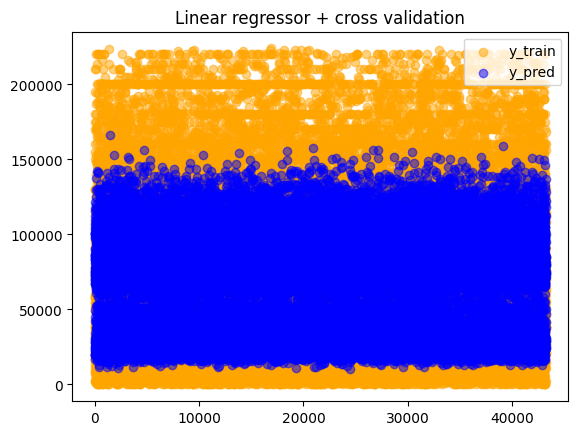

In [14]:
plt.scatter(range(len(y_train)), y_train, c='orange', label='y_train',  alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, c='blue', label='y_pred', alpha=0.5)

plt.legend()
plt.title('Linear regressor + cross validation')
plt.show()

Text(0, 0.5, 'Data count')

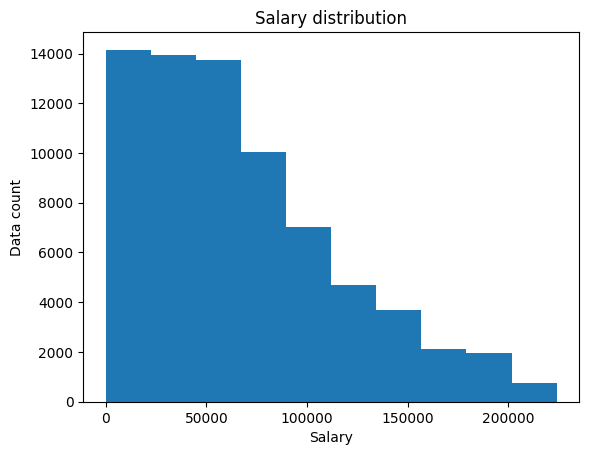

In [ ]:
plt.hist(filtred_data_salary)
plt.title('Salary distribution')
plt.xlabel('Salary')
plt.ylabel('Data count')

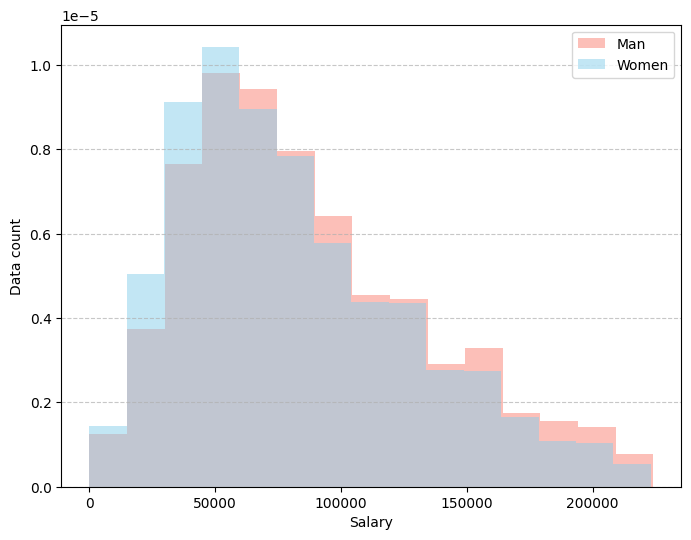

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(dev_man_salary, bins=15, density=True, color='salmon', alpha=0.5, label='Man')


plt.hist(dev_woman_salary, bins=15, density=True, color='skyblue', alpha=0.5, label='Women')

#plt.title('Histogram poprzednich zarobków w krajach rozwiniętych')
plt.xlabel('Salary')
plt.ylabel('Data count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

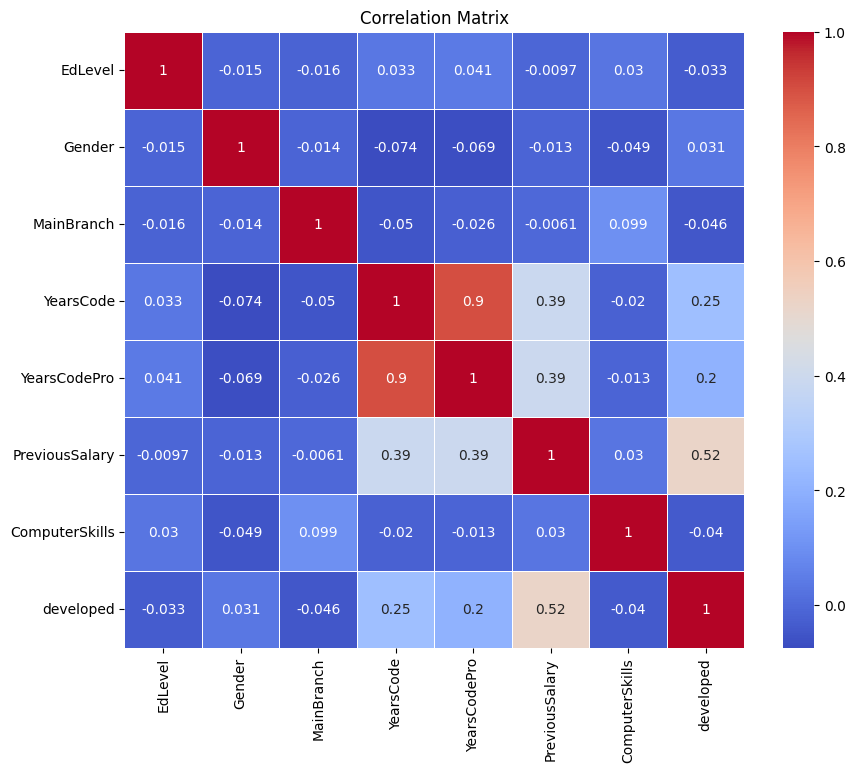

In [ ]:
correlation_matrix = filtred_data.corr()

# Creating corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

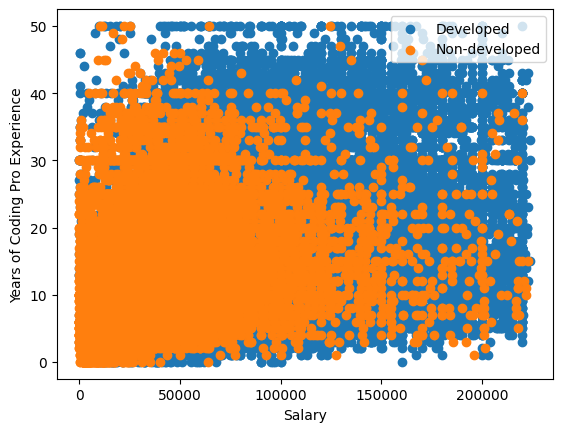

In [ ]:

plt.scatter(data_dev_man['PreviousSalary'], data_dev_man['YearsCode'], label='Developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')
plt.scatter(data_ndev_man['PreviousSalary'], data_ndev_man['YearsCode'], label='Non-developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')

plt.legend()

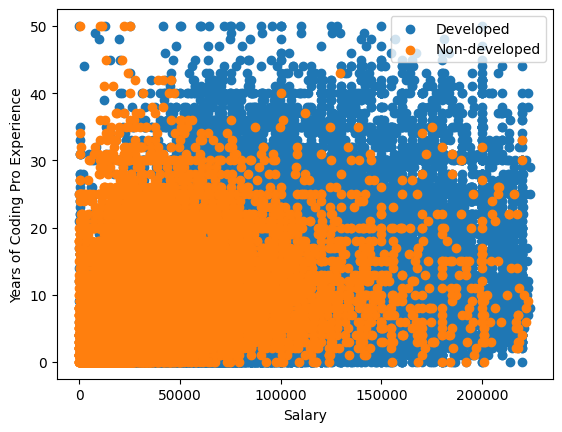

In [ ]:
plt.scatter(data_dev_man['PreviousSalary'], data_dev_man['YearsCodePro'], label='Developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')
plt.scatter(data_ndev_man['PreviousSalary'], data_ndev_man['YearsCodePro'], label='Non-developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')

plt.legend()

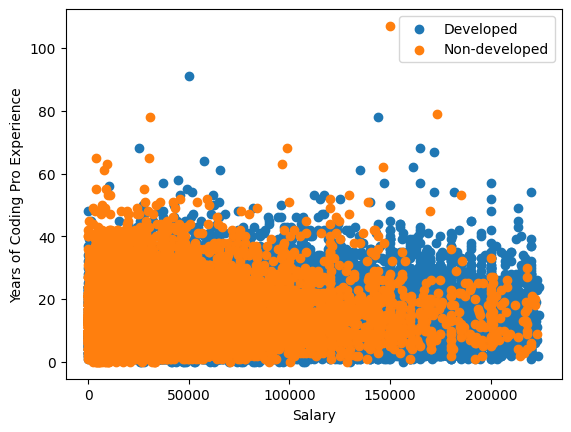

In [ ]:
plt.scatter(data_dev_man['PreviousSalary'], data_dev_man['ComputerSkills'], label='Developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')
plt.scatter(data_ndev_man['PreviousSalary'], data_ndev_man['ComputerSkills'], label='Non-developed')
plt.xlabel('Salary')
plt.ylabel('Years of Coding Pro Experience')

plt.legend()

In [ ]:
data_ndev_man.head(100)

,EdLevel,Gender,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,developed
9,1,1.0,True,20,16,37752.0,6,False
11,2,1.0,True,6,2,11832.0,13,False
15,2,1.0,True,22,15,60480.0,16,False
16,4,1.0,True,7,1,20556.0,5,False
20,4,1.0,False,5,3,22644.0,12,False
...,...,...,...,...,...,...,...,...
355,1,1.0,True,2,1,6852.0,14,False
357,1,1.0,True,10,8,46644.0,20,False
363,1,1.0,True,12,4,24300.0,17,False
367,0,1.0,True,15,9,30000.0,14,False


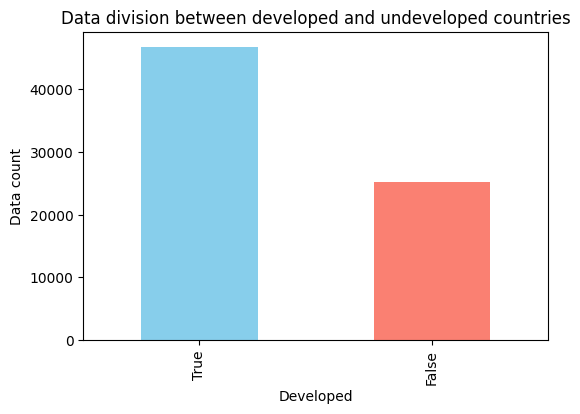

In [ ]:

# Liczenie wystąpień wartości True i False w kolumnie 'developed'
count_values = filtred_data['developed'].value_counts()

# Tworzenie wykresu słupkowego
plt.figure(figsize=(6, 4))
count_values.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Data division between developed and undeveloped countries')
plt.xlabel('Developed')
plt.ylabel('Data count')

Text(0.5, 1.0, 'Data division by gender and development of the country')

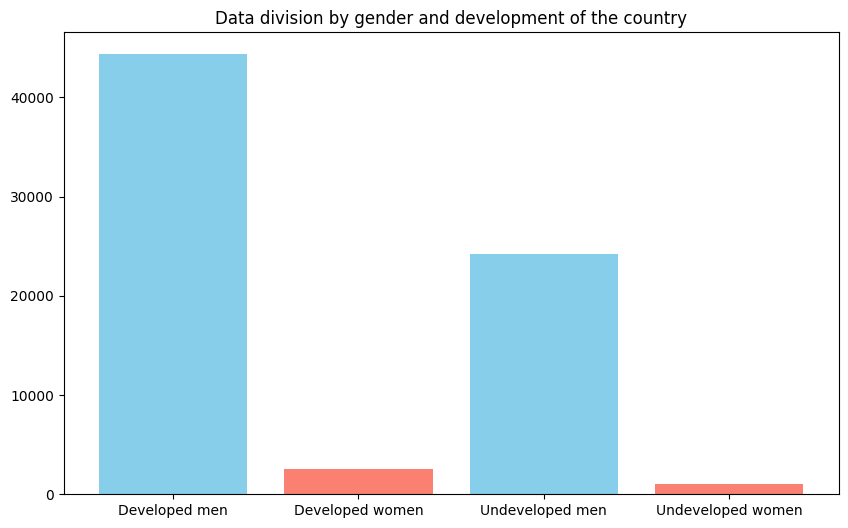

In [ ]:
data_counts = [len(data_dev_man), len(data_dev_woman), len(data_ndev_man), len(data_ndev_woman)]

plt.figure(figsize=(10, 6))
plt.bar(['Developed men', 'Developed women', 'Undeveloped men', 'Undeveloped women'], data_counts, color=['skyblue', 'salmon'])
plt.title('Data division by gender and development of the country')
plt.xlabel('Dataset')
plt.ylabel('Data count')

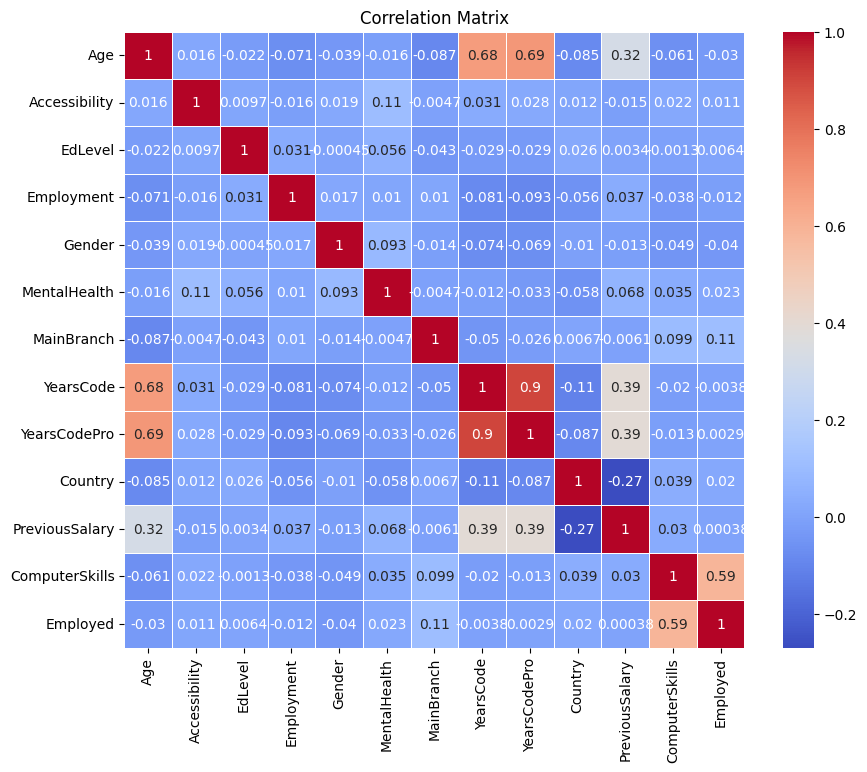

In [ ]:




correlation_matrix = new_data.corr()

# Creating corelation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()



In [ ]:
new_data = data.copy()
new_data = new_data.drop('Unnamed: 0', axis=1)
new_data =new_data.drop('HaveWorkedWith', axis=1) # droping unnessesery datas
new_data = new_data[new_data['Gender'] != 0]
countries = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland', 'France',
    'Germany', 'Hong Kong', 'Iceland', 'Ireland', 'Israel', 'Japan', 'Liechtenstein',
    'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Singapore',
    'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
    'United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'Italy', 'Czech Republic', 'Slovakia',
    'Greece', 'Taiwan', 'Hong Kong', 'Croatia', 'Cyprus', 'Latvia', 'Lithuania', 'Estonia']

new_data['developed'] = new_data['Country'].isin(countries)
new_data = new_data.drop('Country', axis=1)

mental_health_mapping = {'Yes': 1, 'No': 0}
main_branch_mapping = {'Dev': 1, 'NotDev': 0}
age_mapping = {'>35': 1, '<35': 0}
acc_mapping = {'Yes': 1, 'No': 0}
ed_level_mapping = {'Master': 1, 'Undergraduate': 2, 'PhD': 3, 'Other': 4, 'NoHigherEd': 0}

new_data['MentalHealth'] = new_data['MentalHealth'].map(mental_health_mapping)
new_data['MainBranch'] = new_data['MainBranch'].map(main_branch_mapping)
new_data['developed'] = new_data['developed'].map(developed_mapping)
new_data['Age'] = new_data['Age'].map(age_mapping)
new_data['Accessibility'] = new_data['Accessibility'].map(acc_mapping)
new_data['EdLevel'] = data['EdLevel'].map(ed_level_mapping)


<ipython-input-80-cc80098377db>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  new_data.hist(ax=axes)


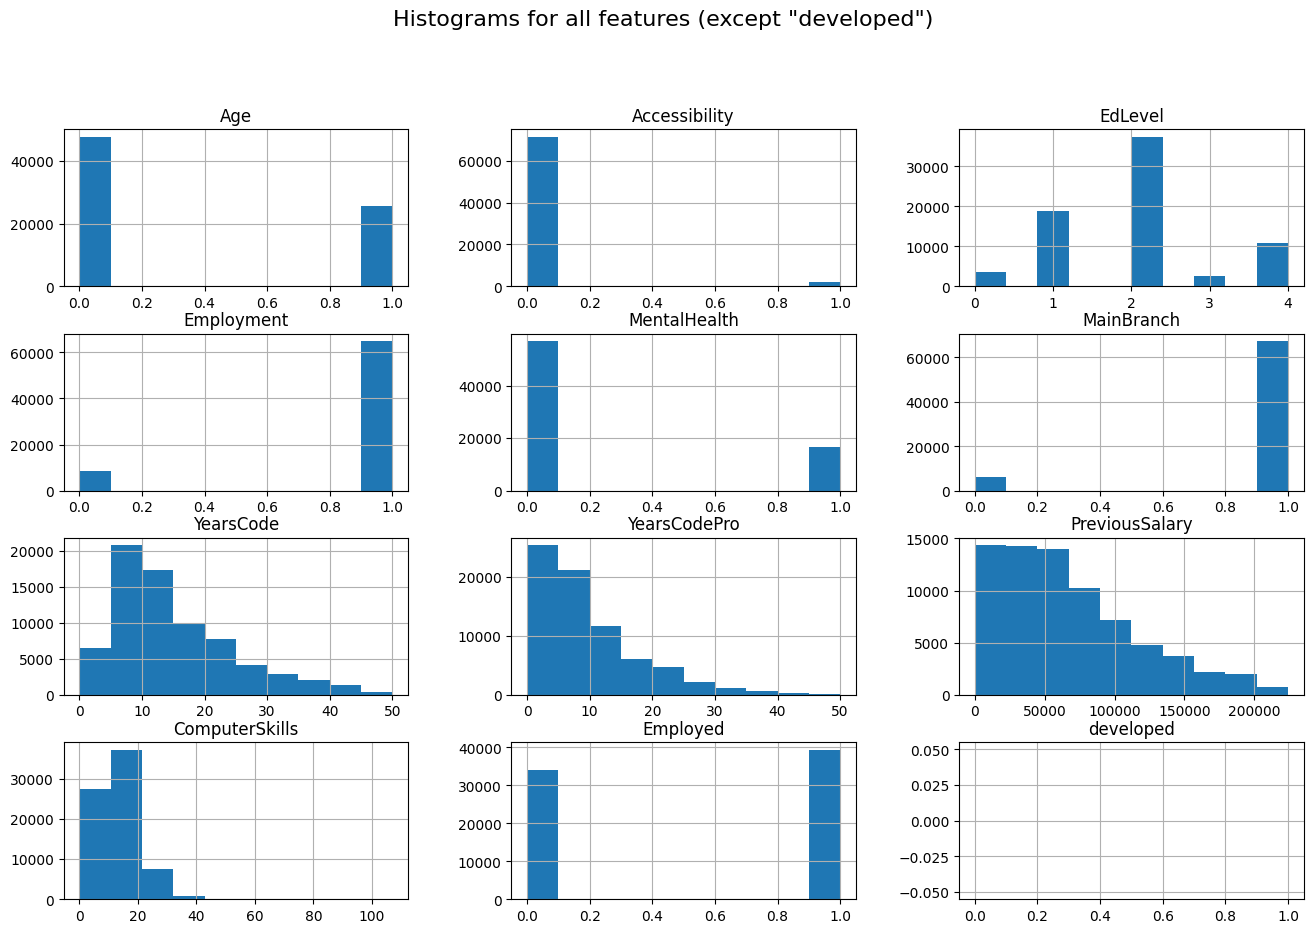

In [ ]:
fig, axes = plt.subplots(figsize=(16, 10))

new_data.hist(ax=axes)

# Dodajemy etykiety i tytuł
plt.suptitle('Histograms for all features (except "developed")', x=0.5, y=1.0, fontsize=16)
plt.show()

In [ ]:
new_data.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed,developed
0,False,False,1,True,1,False,True,7,4,51552.0,4,0,True
1,False,False,2,True,1,False,True,12,5,46482.0,12,1,True
2,False,False,1,True,1,False,True,15,6,77290.0,7,0,True
3,False,False,2,True,1,False,True,9,6,46135.0,13,0,True
4,True,False,3,False,1,False,False,40,30,160932.0,2,0,True
